# Setup

In [1]:
from pyiron import Project
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
plt.rc('figure', figsize=(16,8))
plt.rc('font', size=18)

In [3]:
pr = Project('training')

In [4]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,17168587,finished,None,full,/full,/cmmc/u/,zora/pyiron/projects/2022/POTENTIALS/TutorialNotebooks/workshop_preparation/introduction/training/,2022-06-03 00:02:34.816533,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
2,17168588,finished,None,basic,/basic,/cmmc/u/,zora/pyiron/projects/2022/POTENTIALS/TutorialNotebooks/workshop_preparation/introduction/training/,2022-06-03 00:02:47.281055,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
1,17168589,finished,None,Al_basic_atomicrex,/Al_basic_atomicrex,/cmmc/u/,zora/pyiron/projects/2022/POTENTIALS/TutorialNotebooks/workshop_preparation/introduction/training/,2022-06-03 00:02:48.226369,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None


# Loading Containers

In [5]:
tcf = pr.load('full')
tcb = pr.load('basic')

# Some Predefined Plots

## Cell Information

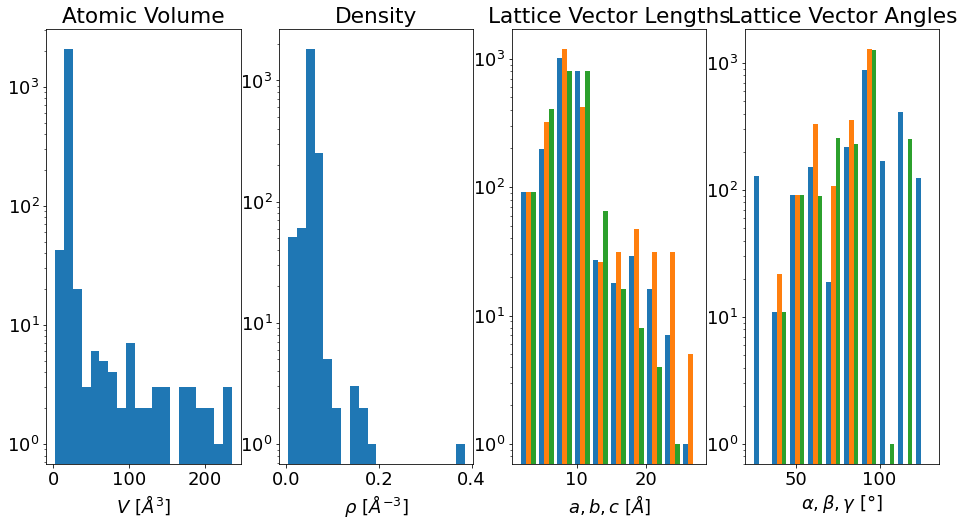

In [8]:
tcb.plot.cell();

## Cell Symmetries

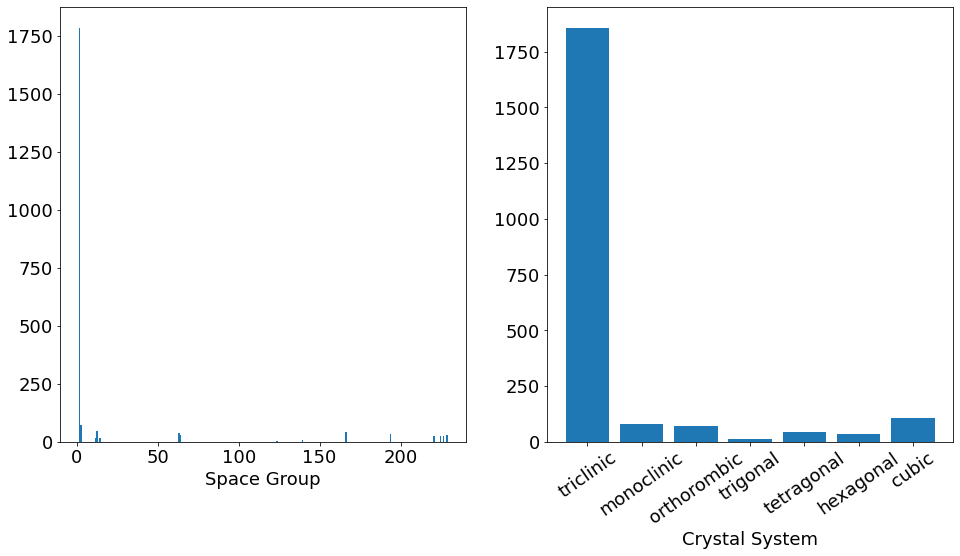

In [9]:
tcb.plot.spacegroups();

## E-V Curves

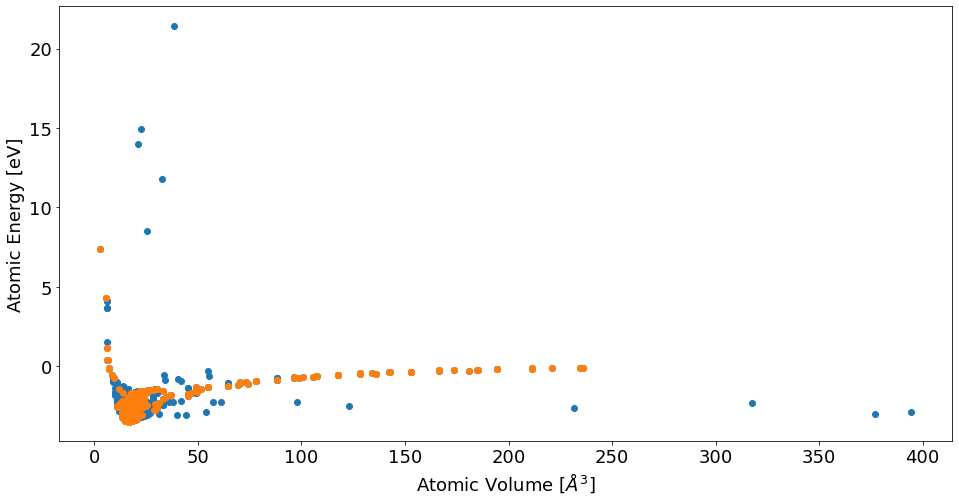

In [10]:
tcf.plot.energy_volume();
tcb.plot.energy_volume();

# Custom Plots from Data

In [11]:
df = tcb.to_pandas()

## E-V by Concentration

In [12]:
df['concentration'] = df.atoms.map(lambda s: (s.get_chemical_symbols()=='Li').mean())

In [13]:
df['energy_atom'] = (df.energy / df.number_of_atoms)

In [14]:
df['volume_atom'] = df.atoms.map(lambda s: s.get_volume(per_atom=True))

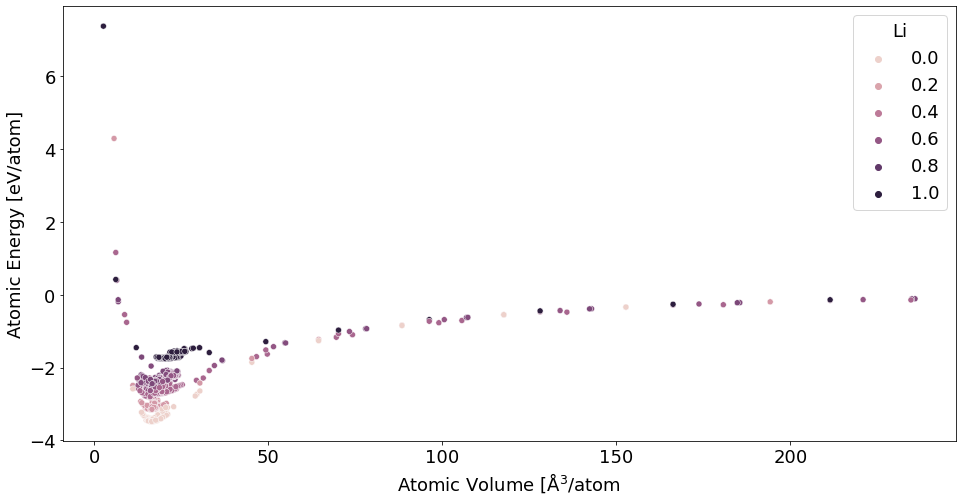

In [15]:
sns.scatterplot(
    data=df,
    x='volume_atom',
    y='energy_atom',
    hue='concentration'
)
plt.xlabel(r'Atomic Volume [$\mathrm{\AA}^3$/atom')
plt.ylabel(r'Atomic Energy [eV/atom]')
plt.legend(title='Li')

## Convex Hull

First find the equilibrium energy at the terminal concentrations.

In [16]:
e_min_al = df.query('concentration == 0').energy_atom.min()
e_min_li = df.query('concentration == 1').energy_atom.min()
print(e_min_al, e_min_li)

-3.4827513025 -1.757035875


Next calculate the deviation to the "ideal" mixing enthalpy

$$
e(c_\mathrm{Li}) = e_\mathrm{Al} + c_\mathrm{Li} (e_\mathrm{Li} - e_\mathrm{Al})
$$

and call that the energy excess, where $e$ are the per atom equilibrium energies of the pure phases.

In [17]:
df['energy_atom_excess'] = df.energy_atom - df.concentration * (e_min_li - e_min_al) - e_min_al

Text(0, 0.5, 'Excess Energy [eV/atom]')

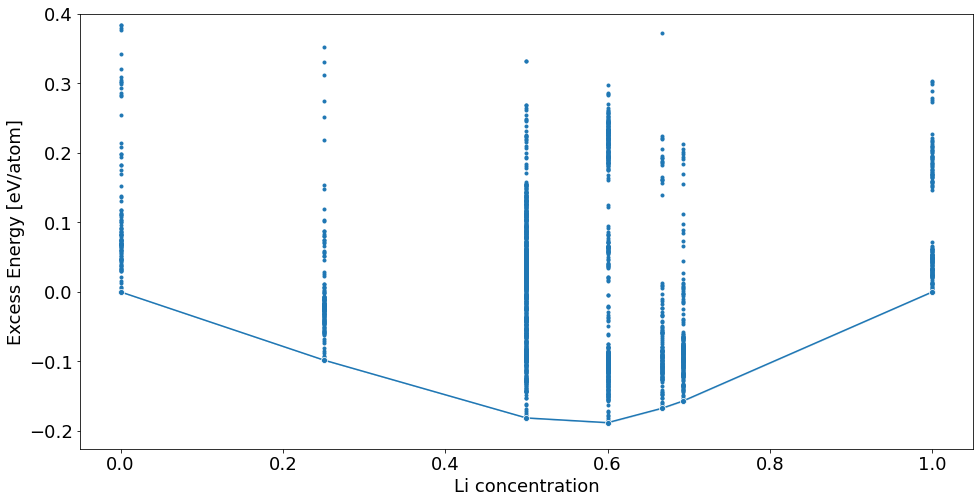

In [18]:
sns.lineplot(data=df,
             marker='o',
             x='concentration', y='energy_atom_excess',
             estimator=np.min)
plt.scatter(df.concentration, df.energy_atom_excess, marker='.')
plt.ylim(df.energy_atom_excess.min() * 1.2, .4)
plt.xlabel('Li concentration')
plt.ylabel('Excess Energy [eV/atom]')